## CW generation.


In [1]:
! pip install pmcx
! pip install numpy pmcx jdata bjdata matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import sys
import os
import pmcx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle
import math
import io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path to your folder containing the .py script
folder_path = '/content/drive/MyDrive/MCX_data'

# Add to sys.path so you can import the script
if folder_path not in sys.path:
    sys.path.append(folder_path)
from FD_msNIRS_2layers import mcx_sim_2layers as ms2

In [4]:
!ls '/content/drive/MyDrive/MCX_data'

2_L_30_mu_as_df.csv	       EC.xlsx		     FD_msNIRS.py
2_L_30_mu_s_primes_df.csv.csv  FD_msNIRS_2layers.py  __pycache__


In [5]:
pmcx.gpuinfo()

[{'name': 'NVIDIA A100-SXM4-40GB',
  'id': 1,
  'devcount': 1,
  'major': 8,
  'minor': 0,
  'globalmem': 42474471424,
  'constmem': 65536,
  'sharedmem': 49152,
  'regcount': 65536,
  'clock': 1410000,
  'sm': 108,
  'core': 6912,
  'autoblock': 64,
  'autothread': 442368,
  'maxgate': 0}]

### Define Tissue Properties

In [10]:
# layer 1
HbO1 = 31  # microMolar
Hb1 = 19

# layer 2
HbO2 = 31
Hb2 = 19
l1 = 20 # in mm

lambdas = [784, 800, 818, 835, 851, 868, 881, 894]
excel_path = '/content/drive/MyDrive/MCX_data/EC.xlsx'
extinction_coeffs = pd.read_excel(excel_path)

In [11]:
type(extinction_coeffs)

pandas.core.frame.DataFrame

### MCX Simulation using packgae

In [12]:
import time
start_time = time.time()
result_dict = ms2(HbO1, Hb1, HbO2, Hb2, l1, extinction_coeffs, tend =1e-08, devf = 1, nphoton = 5e7, source_type = 'laser')
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Simulation time: {elapsed_time:.2f} seconds")
elapsed_time = (elapsed_time * 50000) / (60*60*24)
print(f"Simulation time for 50000 with one GPU: {elapsed_time:.4f} days")

nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxdetphoton: 5e+07
issrcfrom0: 1
autopilot: 1
unitinmm: 1
issaveref: 1
issavedet: 1
nphoton: 5e+07
tstart: 0
tstep: 1e-08
tend: 1e-08
maxde

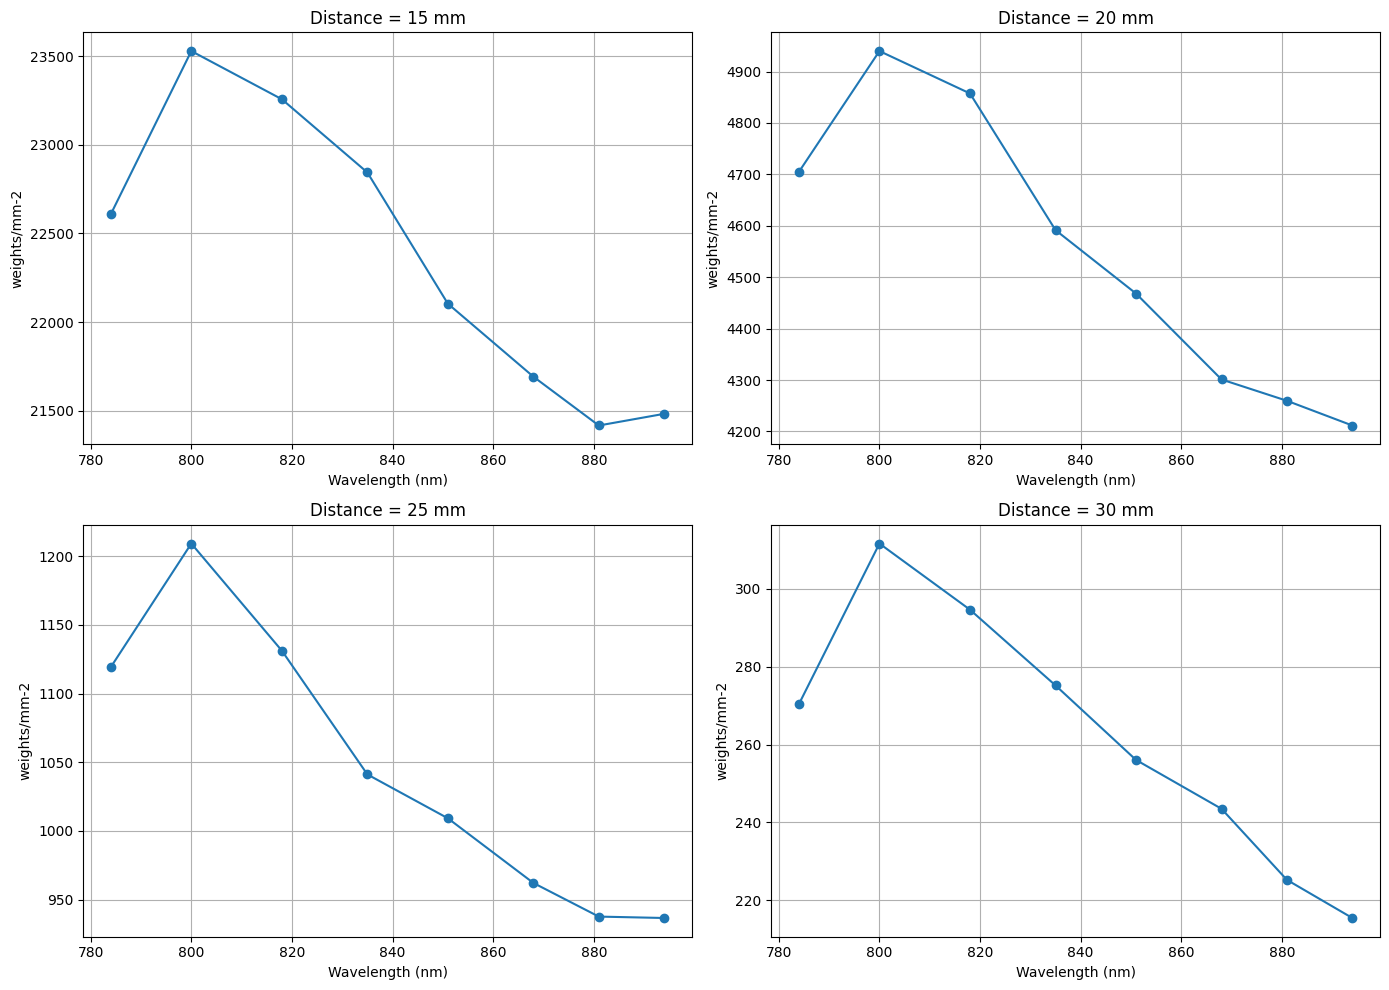

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, (distance, values) in enumerate(result_dict.items()):
    axs[idx].plot(lambdas, values, marker='o')
    axs[idx].set_title(f'Distance = {distance} mm')
    axs[idx].set_xlabel('Wavelength (nm)')
    axs[idx].set_ylabel('weights/mm-2')
    axs[idx].grid(True)

plt.tight_layout()
plt.show()